# pandas 入门

* 版本号： 0.1
* 创建时间： 2015年 02月 07日 星期六 10:26:33 CST
* 修改时间： 2015年 03月 21日 星期六 12:28:33 CST

## 建立环境

### 安装 pandas

    sudo apt-get install build-essential python-dev 
    sudo apt-get install python-pandas python-tk
    sudo apt-get install python-scipy python-matplotlib python-tables
    sudo apt-get install python-numexpr python-xlrd python-statsmodels
    sudo apt-get install python-openpyxl python-xlwt python-bs4
    
    if use virtualenv before install matplotlib should install libpng-dev, libjpeg8-dev, libfreetype6-dev

### 安装 ipython-notebook

    sudo pip install "ipython[notebook]"
    sudo pip install pygments

### 运行 ipython-notebook

    ipython notebook
    #如果你使用matplotlib内嵌进网页中,那么需要运行:
    ipython notebook --matplotlib inline

## 导入 pandas

In [1]:
import pandas as pd
import numpy as np

## 读入数据

In [2]:
# 读入 CSV 格式数据
# 数据来源：http://boxofficemojo.com/daily/
df_movies = pd.read_csv('movies.csv', sep='\t', encoding='utf-8')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,"$26,168,351",American Sniper,"$9,905,616"
1,2,Jan. 31,Sat,31,"$41,633,588",American Sniper,"$16,510,536"
2,3,Feb. 1,Sun,32,"$12,515,579",American Sniper,"$4,244,376"
3,4,Feb. 2,Mon,33,"$6,475,068",American Sniper,"$2,645,109"
4,5,Feb. 3,Tue,34,"$7,825,091",American Sniper,"$2,923,141"


In [3]:
df_movies = pd.read_csv('movies.csv', sep='\t', encoding='utf-8',thousands=',',escapechar='$')
df_movies.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


从数据库读入数据参见：http://stackoverflow.com/questions/10065051/python-pandas-and-databases-like-mysql

## 复制数据

In [4]:
df = df_movies.copy()
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


## 导出数据

In [5]:
#导出周六的数据，格式为 CSV
df[ (df['Day'] == 'Sat') ].to_csv('test_output.csv', mode='w', encoding='utf-8', index=False)

In [6]:
#在前面的文件中追加周日的数据
df[ (df['Day'] == 'Sun') ].to_csv('test_output.csv', mode='a', header=False, encoding='utf-8', index=False)

## 显示数据

In [7]:
#显示开头的数据，缺省显示 5 条
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [8]:
#显示开头的数据，指定显示 3 条
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [9]:
#显示末尾的数据，缺省显示 5 条
df.tail()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
24,25,Feb. 23,Mon,54,7385671,Fifty Shades of Grey,1846390
25,26,Feb. 24,Tue,55,9424126,Fifty Shades of Grey,2265910
26,27,Feb. 25,Wed,56,6862942,Fifty Shades of Grey,1772230
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000


In [10]:
#显示末尾的数据，缺省显示 2 条
df.tail(2)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000


In [11]:
#只显示指定的行和列
df.iloc[[1,3,5],[0,1,2,3]]

,Row,Date,Day,Day#
1,2,Jan. 31,Sat,31
3,4,Feb. 2,Mon,33
5,6,Feb. 4,Wed,35


In [12]:
df.loc[[1,3,5],['Date', 'Gross']]

,Date,Gross
1,Jan. 31,16510536
3,Feb. 2,2645109
5,Feb. 4,2273342


## 操作单元

In [13]:
df = df_movies.copy()
# 单元格赋值
# 单个单元格赋值
df.ix[0, u'#1 Movie'] = u'土豆之歌'
df.loc[df.index[1], u'Gross']= 999
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,土豆之歌,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,999
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [14]:
# 多单个单元格赋值
df.loc[df.index[0:2], u'Gross'] = [100, 200]
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,土豆之歌,100
1,2,Jan. 31,Sat,31,41633588,American Sniper,200
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376


## 操作列

### 改变列头

#### 使用 columns 属性

In [15]:
df = df_movies.copy()
#用一个列表来显式地指定，列表长度必须与列数一致
# 示例 1
df.columns = [u'Row', u'Date', u'WeekDay', u'Day', u'Top10Gross', u'No1Moive', u'Gross']
df.head()

,Row,Date,WeekDay,Day,Top10Gross,No1Moive,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [16]:
# 示例 2 ：大写转小写
df.columns = [c.lower() for c in df.columns]
df.head()

,row,date,weekday,day,top10gross,no1moive,gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


#### 使用 rename 方法

In [17]:
# 示例 1 ：小写转大写
df = df.rename(columns=lambda x: x.upper())
df.tail(3)

,ROW,DATE,WEEKDAY,DAY,TOP10GROSS,NO1MOIVE,GROSS
26,27,Feb. 25,Wed,56,6862942,Fifty Shades of Grey,1772230
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000


In [18]:
# 示例 2 ：改变特定的列头
df = df.rename(columns={'DATE': u'日期', 'GROSS': u'票房'})
df.head()

,ROW,日期,WEEKDAY,DAY,TOP10GROSS,NO1MOIVE,票房
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


### 打印列类型

In [19]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): [u'ROW', u'DAY', u'TOP10GROSS', u'\u7968\u623f'],
 dtype('O'): [u'\u65e5\u671f', u'WEEKDAY', u'NO1MOIVE']}

In [20]:
# 打印列类型(清晰打印中文)
types = df.columns.to_series().groupby(df.dtypes).groups
for key, value in types.items():
    print key,':\t', ','.join(value)

object :	日期,WEEKDAY,NO1MOIVE
int64 :	ROW,DAY,TOP10GROSS,票房


### 插入列

In [21]:
df = df_movies.copy()
# 方式一：在末尾添加
df['memo'] = pd.Series('', index=df.index)
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,memo
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,


In [22]:
# 方式二：在中间插入
df = df_movies.copy()
df.insert(loc=1, column=u'year', value=u'2015')
df.head(3)

,Row,year,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,2015,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,2015,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,2015,Feb. 1,Sun,32,12515579,American Sniper,4244376


In [23]:
# 根据现有值生成一个新的列
df = df_movies.copy()
df.insert(loc = 5 , column=u'OtherGross', value=df[u'Top 10 Gross'] - df[u'Gross'])
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,OtherGross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,16262735,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,25123052,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,8271203,American Sniper,4244376


In [24]:
# 根据现有值生成多个新的列
# 方法一
df = df_movies.copy()
def process_date_col(text):
    #根据日期生成月份和日两个新的列
    if pd.isnull(text):
        month = day = np.nan
    else:
        month, day = text.split('.')
    return pd.Series([month, day])

df[[u'month', u'day']] = df.Date.apply(process_date_col)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


In [25]:
# 方法二(结果同上，但是没有方法一好)
df = df_movies.copy()
for idx, row in df.iterrows():
    df.ix[idx, u'month'], df.ix[idx, 'day'] = process_date_col(row[u'Date'])
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,month,day
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,Jan,30
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,Jan,31
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,Feb,1
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,Feb,2
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,Feb,3


### 改变列值

In [26]:
df = df_movies.copy()
#根据一列的值改变另一列
df[u'#1 Movie'] = df[u'#1 Movie'].apply(lambda x: x[::-1])
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,repinS naciremA,9905616
1,2,Jan. 31,Sat,31,41633588,repinS naciremA,16510536
2,3,Feb. 1,Sun,32,12515579,repinS naciremA,4244376


In [27]:
# 同时改变多个列的值
cols = [u'Gross', u'Top 10 Gross']
df[cols] = df[cols].applymap(lambda x: x/10000)
df.head(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,2616,repinS naciremA,990
1,2,Jan. 31,Sat,31,4163,repinS naciremA,1651
2,3,Feb. 1,Sun,32,1251,repinS naciremA,424


## 操作行

In [28]:
df = df_movies.copy()
# 添加一个空行
df = df.append(pd.Series(
                [np.nan]*len(df.columns), # Fill cells with NaNs
                index=df.columns),
                ignore_index=True)
df.tail(3)

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,26457000,Focus (2015),6465000
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 空值处理（NaN）

In [29]:
# 计数有空值的行
nans = df.shape[0] - df.dropna().shape[0]
print(u'一共有 %d 行出现空值' % nans)

# 填充空值为`无`
df.fillna(value=u'无', inplace=True)
df.tail()

一共有 1 行出现空值


,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
25,26,Feb. 24,Tue,55,9424126,Fifty Shades of Grey,2265910
26,27,Feb. 25,Wed,56,6862942,Fifty Shades of Grey,1772230
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
28,29,Feb. 27,Fri,58,2.6457e+07,Focus (2015),6465000
29,无,无,无,无,无,无,无


## 排序

In [30]:
df = df_movies.copy()
# 添加一个空行
df = df.append(pd.Series(
                [np.nan]*len(df.columns), # Fill cells with NaNs
                index=df.columns),
                ignore_index=True)
# 根据某一列排序（由低到高）
df.sort(u'Gross', ascending=True, inplace=True)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
12,13,Feb. 11,Wed,42,6138013,American Sniper,1468160
13,14,Feb. 12,Thu,43,5969515,SpongeBob,1527552
26,27,Feb. 25,Wed,56,6862942,Fifty Shades of Grey,1772230
27,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
24,25,Feb. 23,Mon,54,7385671,Fifty Shades of Grey,1846390


In [31]:
# 排序后重新编制索引
df.index = range(1,len(df.index)+1)
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,13,Feb. 11,Wed,42,6138013,American Sniper,1468160
2,14,Feb. 12,Thu,43,5969515,SpongeBob,1527552
3,27,Feb. 25,Wed,56,6862942,Fifty Shades of Grey,1772230
4,28,Feb. 26,Thu,57,7161773,Fifty Shades of Grey,1790520
5,25,Feb. 23,Mon,54,7385671,Fifty Shades of Grey,1846390


## 过滤

In [32]:
df = df_movies.copy()
# 根据列类型过滤
# 只选择字符串型的列
df.loc[:, (df.dtypes == np.dtype('O')).values].head()

,Date,Day,#1 Movie
0,Jan. 30,Fri,American Sniper
1,Jan. 31,Sat,American Sniper
2,Feb. 1,Sun,American Sniper
3,Feb. 2,Mon,American Sniper
4,Feb. 3,Tue,American Sniper


In [33]:
# 选择 artifact 为空值的行
df.ix[0, u'Gross'] = np.nan
df.ix[3, u'Gross'] = np.nan
df[df[u'Gross'].isnull()].head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,NaN
3,4,Feb. 2,Mon,33,6475068,American Sniper,NaN


In [34]:
# 选择'Gross'为非空值的行
df[df[u'Gross'].notnull()].head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141
5,6,Feb. 4,Wed,35,5819529,American Sniper,2273342
6,7,Feb. 5,Thu,36,6165344,American Sniper,2506106


In [35]:
# 根据条件过滤
df[ (df[u'Day'] == u'Sat') | (df[u'Day#'] <= 32) ]

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,NaN
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
8,9,Feb. 7,Sat,38,59153298,SpongeBob,24086968
15,16,Feb. 14,Sat,45,87900659,Fifty Shades of Grey,36752460
22,23,Feb. 21,Sat,52,43708356,Fifty Shades of Grey,8991100


In [36]:
df[ (df[u'Day'] == u'Sat') & (df[u'Day#'] <= 32) ]

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536


## 切片

## 合并

## 统计：计数，平均，最大，最小，方差，标准差

## 同比，环比

## 图形化

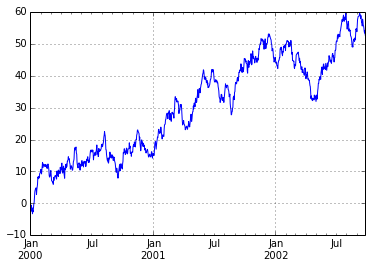

In [37]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [38]:
df = df_movies.copy()
df[u'Date'] = pd.to_datetime(df[u'Date'] + ',2015' )
df.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,2015-01-30,Fri,30,26168351,American Sniper,9905616
1,2,2015-01-31,Sat,31,41633588,American Sniper,16510536
2,3,2015-02-01,Sun,32,12515579,American Sniper,4244376
3,4,2015-02-02,Mon,33,6475068,American Sniper,2645109
4,5,2015-02-03,Tue,34,7825091,American Sniper,2923141


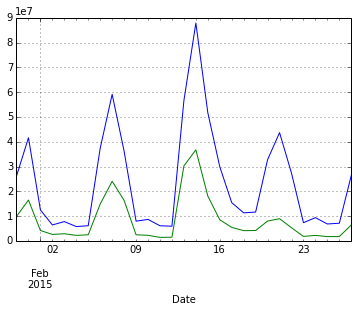

In [39]:
df.plot(x='Date', y=['Top 10 Gross', 'Gross'])

## 使用另一个 DataFrame 来更新数据

In [40]:
df_1 = df_movies.copy()
df_2 = pd.DataFrame({u'#1 Movie':[u'American Sniper',
                            u'SpongeBob',
                            u'Fifty Shades of Grey'],
                            u'chs':[u'美国阻击手',
                                    u'海绵宝宝',
                                    u'五十度灰']})
df_1.head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141


In [41]:
df_2.head()

,#1 Movie,chs
0,American Sniper,美国阻击手
1,SpongeBob,海绵宝宝
2,Fifty Shades of Grey,五十度灰


In [42]:
pd.merge(df_1, df_2, on=u'#1 Movie').head()

,Row,Date,Day,Day#,Top 10 Gross,#1 Movie,Gross,chs
0,1,Jan. 30,Fri,30,26168351,American Sniper,9905616,美国阻击手
1,2,Jan. 31,Sat,31,41633588,American Sniper,16510536,美国阻击手
2,3,Feb. 1,Sun,32,12515579,American Sniper,4244376,美国阻击手
3,4,Feb. 2,Mon,33,6475068,American Sniper,2645109,美国阻击手
4,5,Feb. 3,Tue,34,7825091,American Sniper,2923141,美国阻击手
